In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [2]:
raw_data=pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')
raw_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
raw_data.shape

(13320, 9)

In [4]:
list(raw_data.groupby('area_type'))

[('Built-up  Area',
              area_type   availability               location       size  \
  2      Built-up  Area  Ready To Move            Uttarahalli      3 BHK   
  13     Built-up  Area  Ready To Move              Gottigere      2 BHK   
  20     Built-up  Area  Ready To Move                Kengeri      1 BHK   
  27     Built-up  Area         20-Dec             Whitefield      3 BHK   
  34     Built-up  Area  Ready To Move          Kasturi Nagar      3 BHK   
  ...               ...            ...                    ...        ...   
  13280  Built-up  Area  Ready To Move               Sarjapur      3 BHK   
  13307  Built-up  Area  Ready To Move           Billekahalli      3 BHK   
  13308  Built-up  Area  Ready To Move      Bannerghatta Road      3 BHK   
  13315  Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
  13317  Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   
  
         society total_sqft  bath  balcony  price  
  2          

In [5]:
list(raw_data.groupby('area_type')['area_type'])

[('Built-up  Area',
  2        Built-up  Area
  13       Built-up  Area
  20       Built-up  Area
  27       Built-up  Area
  34       Built-up  Area
                ...      
  13280    Built-up  Area
  13307    Built-up  Area
  13308    Built-up  Area
  13315    Built-up  Area
  13317    Built-up  Area
  Name: area_type, Length: 2418, dtype: object),
 ('Carpet  Area',
  297      Carpet  Area
  340      Carpet  Area
  352      Carpet  Area
  594      Carpet  Area
  622      Carpet  Area
               ...     
  13006    Carpet  Area
  13183    Carpet  Area
  13214    Carpet  Area
  13238    Carpet  Area
  13305    Carpet  Area
  Name: area_type, Length: 87, dtype: object),
 ('Plot  Area',
  1        Plot  Area
  9        Plot  Area
  11       Plot  Area
  14       Plot  Area
  22       Plot  Area
              ...    
  13291    Plot  Area
  13300    Plot  Area
  13303    Plot  Area
  13306    Plot  Area
  13311    Plot  Area
  Name: area_type, Length: 2025, dtype: object),
 ('Super 

In [6]:
list(raw_data.groupby('area_type')['location'])

[('Built-up  Area',
  2                  Uttarahalli
  13                   Gottigere
  20                     Kengeri
  27                  Whitefield
  34               Kasturi Nagar
                   ...          
  13280                 Sarjapur
  13307             Billekahalli
  13308        Bannerghatta Road
  13315               Whitefield
  13317    Raja Rajeshwari Nagar
  Name: location, Length: 2418, dtype: object),
 ('Carpet  Area',
  297      Maruthi Sevanagar
  340       Muneshwara Nagar
  352           Sampigehalli
  594           Sanjay nagar
  622      Bannerghatta Road
                 ...        
  13006     Kereguddadahalli
  13183        Shivaji Nagar
  13214    Bannerghatta Road
  13238         Hennur Bande
  13305             Hulimavu
  Name: location, Length: 87, dtype: object),
 ('Plot  Area',
  1             Chikka Tirupathi
  9                 Gandhi Bazar
  11                  Whitefield
  14                    Sarjapur
  22                 Thanisandra
     

 ## Data Preprocessing

In [7]:
raw_data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
raw_data.groupby('area_type')['location'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8789
Name: location, dtype: int64

In [9]:
featured_data=raw_data.drop(['area_type','availability','society'],axis='columns')
featured_data.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
featured_data.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
featured_data.dropna(inplace=True)

In [12]:
featured_data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
featured_data.shape

(12710, 6)

In [14]:
featured_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [15]:
featured_data['balcony'].unique()

array([1., 3., 2., 0.])

In [16]:
featured_data['bhk']=featured_data['size'].apply(lambda x: int(x.split(' ')[0]))
featured_data.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [17]:
featured_data.drop(['size'],axis='columns',inplace=True)
featured_data.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


## Error check in the dataset 

In [18]:
featured_data.loc[featured_data['bhk']>11] #featured_data[featured_data['bhk']>15] #featured_data[featured_data.bhk>15]

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43
4916,1Channasandra,1250,15.0,0.0,125.0,14
6533,Mysore Road,2232,6.0,2.0,300.0,12
9935,1Hoysalanagar,5425,13.0,0.0,275.0,13


In [19]:
featured_data.shape

(12710, 6)

In [20]:
featured_data.groupby('bhk')['bhk'].agg('count')

bhk
1      648
2     5480
3     4655
4     1238
5      299
6      192
7       85
8       68
9       34
10       3
11       3
12       1
13       1
14       1
27       1
43       1
Name: bhk, dtype: int64

In [21]:
featured_data.bhk.describe()

count    12710.000000
mean         2.737136
std          1.205097
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: bhk, dtype: float64

In [22]:
featured_data.groupby('total_sqft')['total_sqft'].agg('count')

total_sqft
1.25Acres        1
1.26Acres        1
1000           170
1000 - 1285      1
10000            2
              ... 
995             10
996              4
997              2
998              1
999              3
Name: total_sqft, Length: 1976, dtype: int64

In [23]:
featured_data=featured_data[featured_data['bhk']<=12]

In [24]:
featured_data.shape

(12706, 6)

In [25]:
featured_data.groupby('balcony')['total_sqft'].agg('count')

balcony
0.0    1025
1.0    4897
2.0    5112
3.0    1672
Name: total_sqft, dtype: int64

In [26]:
featured_data=featured_data[featured_data['bath']<=8]
featured_data.shape

(12671, 6)

In [27]:
featured_data.groupby('bath')['bath'].agg('count')

bath
1.0     786
2.0    6834
3.0    3145
4.0    1108
5.0     430
6.0     244
7.0      82
8.0      42
Name: bath, dtype: int64

In [28]:
featured_data.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


### Errorenous values are found in the bedroom and bathroom numbers keeping campatible with the square feet 

In [29]:
featured_data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## Data Cleaning

In [30]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [31]:
featured_data[featured_data['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715,3.0,3.0,112.00,3
13315,Whitefield,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


#### Here we can see the values that shows float values . Now we will locate those values not supposed to be float

In [32]:
featured_data[~featured_data['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2


In [33]:
def clean_data(x):
    tokens=x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    
    try:
        return float(x)
    except:
        return None        

### This function creates some NaN values with should be deleted

In [34]:
clean_data('1000-1000')

1000.0

In [35]:
featured_data['total_sqft']=featured_data['total_sqft'].apply(clean_data)
featured_data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [36]:
featured_data.shape

(12671, 6)

In [37]:
featured_data['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13314    1715.0
13315    3453.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 12671, dtype: float64

In [38]:
featured_data.isnull().sum()

location       0
total_sqft    41
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [39]:
featured_data.dropna(inplace=True)

In [40]:
featured_data.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [41]:
featured_data.shape

(12630, 6)

## Feature Engineering

In [42]:
len(featured_data['location'].unique())

1252

In [43]:
featured_data['location']=featured_data['location'].apply(lambda x : x.strip())

In [44]:
featured_data.groupby('location')['location'].agg('count')

location
1 Annasandrapalya                                  1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
1st Block BEL Layout                               2
1st Block HBR Layout                               3
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1241, dtype: int64

In [45]:
location_stats=featured_data.groupby('location')['location'].agg('count').sort_values()
location_stats.head(100)

location
1 Annasandrapalya                       1
Kengeri Satellite Town ( BDA SITE)      1
Kengeri Satellite Town KHB Apartment    1
Kengeri Satellite Town Stage II         1
Kirloskar layout, Basaveshwarnagar      1
                                       ..
Grihalakshmi Layout                     1
Gubbi Cross, Hennur Main Road           1
Gulakamale                              1
Guni Agrahara                           1
HAL Layout                              1
Name: location, Length: 100, dtype: int64

In [46]:
less_locations=location_stats[location_stats<10]
less_locations

location
1 Annasandrapalya                       1
Kengeri Satellite Town ( BDA SITE)      1
Kengeri Satellite Town KHB Apartment    1
Kengeri Satellite Town Stage II         1
Kirloskar layout, Basaveshwarnagar      1
                                       ..
Banagiri Nagar                          9
Dodsworth Layout                        9
Nagadevanahalli                         9
Nehru Nagar                             9
Peenya                                  9
Name: location, Length: 994, dtype: int64

In [47]:
featured_data['location']=featured_data['location'].apply(lambda x: 'others' if x in less_locations else x)
len(featured_data['location'].unique())

248

### Outliers will be detected now

In [48]:
featured_data['price_per_sqft']=(featured_data['price']*100000)/featured_data['total_sqft']
featured_data.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


### Assume that typical minimum square foot per room is 250 sqft

In [49]:
featured_data=featured_data[~(featured_data['total_sqft']/featured_data['bhk']<250)]
featured_data.shape

(12124, 7)

In [50]:
featured_data['price_per_sqft'].describe()

count     12124.000000
mean       6246.701525
std        4024.922960
min         267.829813
25%        4200.000000
50%        5271.201083
75%        6870.650151
max      176470.588235
Name: price_per_sqft, dtype: float64

#### min price is 267 and max is 176470 which i incompatible because we wanna build a generic model

In [51]:
def remove_outlier_ppsqft(df):
    new_df=pd.DataFrame()
    for key,sub_data in df.groupby('location'):
        mn=np.mean(sub_data['price_per_sqft'])
        stdv=np.std(sub_data['price_per_sqft'])
        accepted_data=sub_data[(sub_data['price_per_sqft']>(mn-stdv)) & (sub_data['price_per_sqft']<=(mn+stdv)) ]
        new_df=pd.concat([new_df,accepted_data])
    return new_df    

In [52]:
new_data=remove_outlier_ppsqft(featured_data)

In [53]:
new_data.shape

(9956, 7)

In [54]:
new_data.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
210,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
848,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2152,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
7138,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
7358,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


## Exploring error (where the 3 bhk should contain higher price than 2 bhk in the same location)

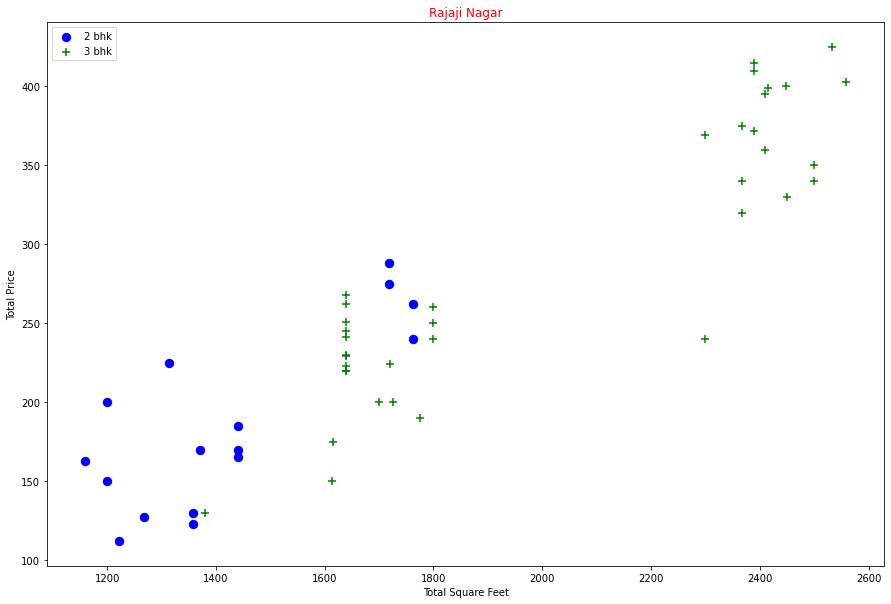

In [55]:
def plot_area(df,location):
    bhk2=df[(df['location']==location) & (df['bhk']==2)]
    bhk3=df[(df['location']==location) & (df['bhk']==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 bhk",s=70)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color="green",label="3 bhk",s=80)
    plt.legend()
    plt.title(location,color='red')
    plt.xlabel('Total Square Feet')
    plt.ylabel('Total Price')
    
plot_area(new_data,"Rajaji Nagar")    

In [56]:
new_data.groupby('location')['location'].agg('count')

location
1st Block Jayanagar             7
1st Block Koramangala           5
1st Phase JP Nagar             17
2nd Phase Judicial Layout       8
2nd Stage Nagarbhavi            7
                             ... 
Yelahanka                     174
Yelahanka New Town             34
Yelenahalli                     9
Yeshwanthpur                   65
others                       2147
Name: location, Length: 248, dtype: int64

In [57]:
new_data.groupby('location')['location'].agg('count').sort_values(ascending=False).head(10)

location
others                   2147
Whitefield                465
Sarjapur  Road            298
Electronic City           284
Kanakpura Road            187
Yelahanka                 174
Uttarahalli               167
Raja Rajeshwari Nagar     161
Thanisandra               151
Marathahalli              139
Name: location, dtype: int64

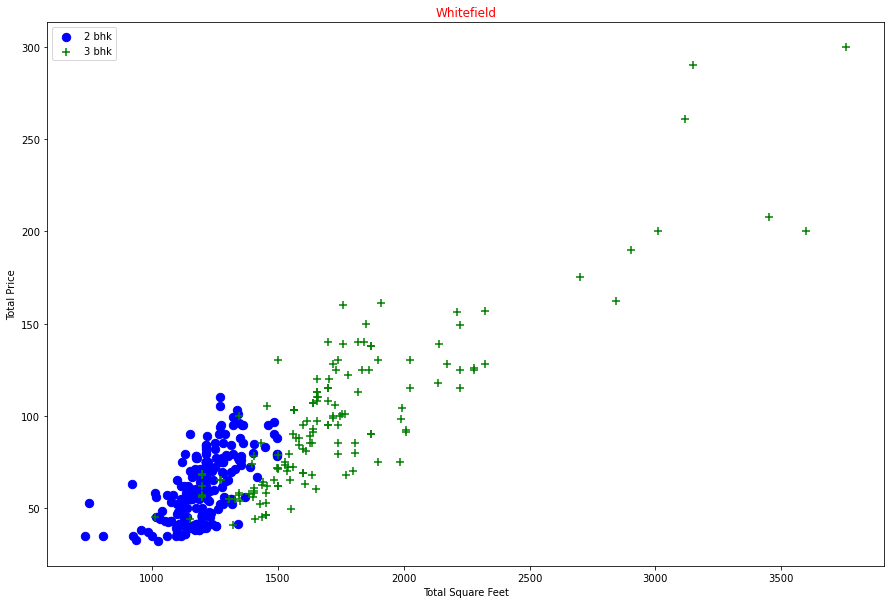

In [58]:
plot_area(new_data,"Whitefield")

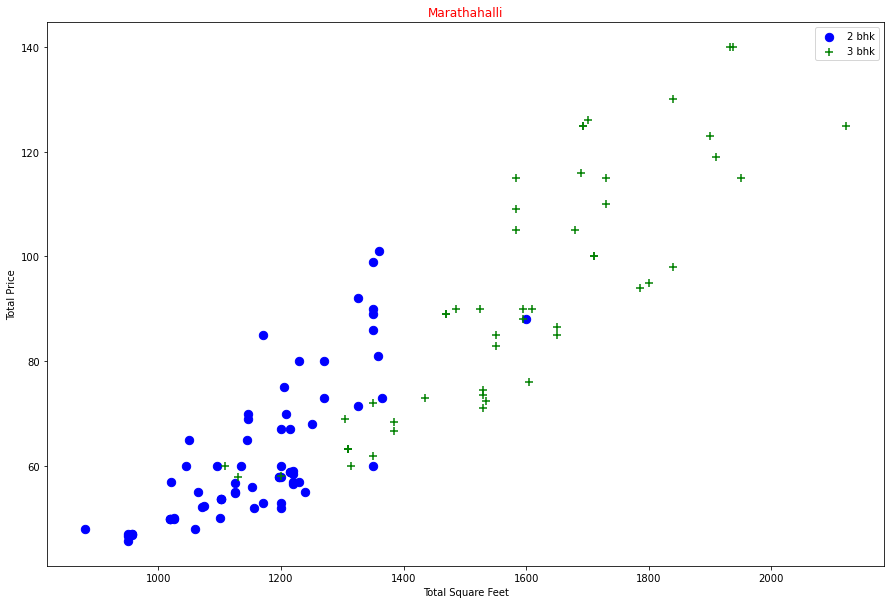

In [59]:
plot_area(new_data,"Marathahalli")

### Now we should remove the properties where for a same location the price of 2 bedrooms is higher than the price of 3 bedrooms 

##### We will make such kind of dictionary
{
   
   '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    
   '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    }, 
    
}

In [60]:
def remove_outliers(df):
    arr_del=np.array([])
    for location_name,location_data in df.groupby('location'):
        bhk_stats=dict()
        for bhk_number,bhk_data in location_data.groupby('bhk'):
            bhk_stats[bhk_number]={
                'mean':np.mean(bhk_data.price_per_sqft),
                'stdv':np.std(bhk_data.price_per_sqft),
                'count':bhk_data.shape[0]
            }
        for bhk_number,bhk_data in location_data.groupby('bhk'):
            prev_stats=bhk_stats.get(bhk_number-1)
            if prev_stats:
                arr_del=np.append(arr_del,bhk_data[bhk_data.price_per_sqft<(prev_stats['mean'])].index.values)
            #exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(arr_del,axis='index')



In [61]:
final_data=remove_outliers(new_data)

In [62]:
final_data.shape

(5977, 7)

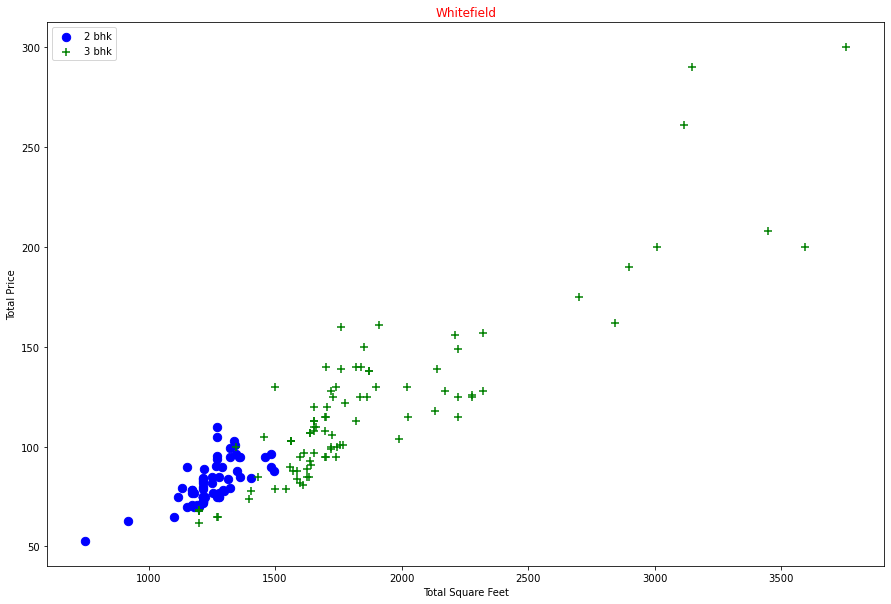

In [63]:
plot_area(final_data,"Whitefield")

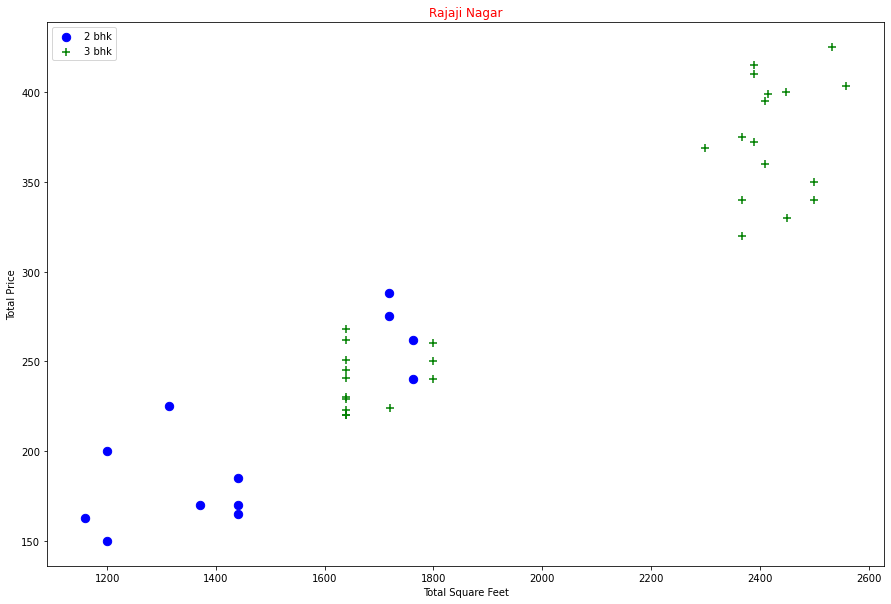

In [64]:
plot_area(final_data,"Rajaji Nagar")   

### From above scatter plot we can see that we can remove the erros successfully

# Now we look forward to building the model

In [65]:
dummies=pd.get_dummies(final_data['location'])
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7383,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10972,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
final_data=pd.concat([final_data,dummies.drop('others',axis='columns')],axis='columns')
final_data.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7383,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,15018.181818,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10972,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,15020.408163,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
final_data

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7383,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,15018.181818,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10972,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,15020.408163,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13223,others,1155.0,2.0,1.0,64.0,2,5541.125541,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13238,others,1200.0,2.0,3.0,70.0,2,5833.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13245,others,1800.0,1.0,1.0,200.0,1,11111.111111,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,others,1353.0,2.0,2.0,110.0,2,8130.081301,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
final_data.drop(['location'],axis='columns',inplace=True)
final_data.head()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7383,2750.0,4.0,0.0,413.0,4,15018.181818,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10972,2450.0,4.0,2.0,368.0,4,15020.408163,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#out=final_data['price']
out.head(60)

NameError: name 'out' is not defined

In [70]:
out.shape

NameError: name 'out' is not defined

In [71]:
final_data.drop(['price'],axis='columns',inplace=True)


In [72]:
final_data.head()

,total_sqft,bath,balcony,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,1.0,4,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3.0,3,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2.0,2,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7383,2750.0,4.0,0.0,4,15018.181818,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10972,2450.0,4.0,2.0,4,15020.408163,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
from sklearn.model_selection import ShuffleSplit
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [74]:
cv=ShuffleSplit(n_splits=6 ,test_size=0.3,random_state=10)
a=list(cross_val_score(LinearRegression(),final_data,out,cv=cv))
for x in a:
    print(x)

NameError: name 'out' is not defined

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_the_best(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    


In [76]:
find_the_best(final_data,out)

NameError: name 'out' is not defined

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(final_data,out,test_size=0.3,random_state=82)

Dt_model=DecisionTreeRegressor(criterion='friedman_mse',splitter= 'best')
Dt_model.fit(x_train,y_train)
Dt_model.score(x_test,y_test)

NameError: name 'out' is not defined

# Above code segment shows the best accuracy

In [78]:
a=np.where(final_data.columns=="bath")
a[0][0]

1

In [79]:
def predict_price(location,sqft,bath,balcony,bhk):
    location_index=np.where(final_data.columns==location)[0][0]
    x=np.zeros(len(final_data.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=balcony
    x[3]=bhk
    if location_index>=0:
        x[location_index]=1
    return Dt_model.predict([x])[0]
predict_price('Indira Nagar',1000, 3, 1,3)

NameError: name 'Dt_model' is not defined

In [80]:
final_data.loc[210][1]

4.0

# Exporting model  into pickle file

In [81]:
import pickle
with open('house_price.pickle','wb') as f:
    pickle.dump(Dt_model,f)

NameError: name 'Dt_model' is not defined

# Exporting the column names into json file

In [82]:
import json
columns={
    'data_cols':[col.lower() for col in final_data.columns]
}
with open('column_names.json','w') as f:
    f.write(json.dumps(columns))